# WeatherPy

In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
from scipy.stats import linregress
from datetime import datetime

# Import API keys
from api_keys import (weather_api_key, g_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#To display all the output in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a seed --> For testing
np.random.seed(1000)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1600)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [66]:
#Create a placeholder DF for the extracted data from API calls
weather_DF = pd.DataFrame(columns=['City','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']) 

#Data to get extracted
summary = ['name', 'coord.lat', 'coord.lon', 'main.temp_max', 'main.humidity', 'clouds.all', 'wind.speed', 'sys.country', 'dt']             

#Parms to pass to the API call
params = {'units': 'imperial',
          'appid' : weather_api_key}

#Iteratively call openweathermap api using python wrapper
print("Beginning Data Retrieval\n\
-----------------------------")
count=0 #Successful queries
for index, city in enumerate(cities):
    try:
        result = owm.get_current(city,**params)
        weather_DF.loc[count] = result(*summary)
        print(f"Processed Record {index} | {city}")
        count+=1
    except:
        print(f"Record {index}: City {city} not found. Skipping...") 
    time.sleep(1) #1 sec delay between API calls
print("-----------------------------\n\
Data Retrieval Complete\n\
-----------------------------")         


Beginning Data Retrieval
-----------------------------
Processed Record 0 | kapaa
Processed Record 1 | rikitea
Processed Record 2 | tasiilaq
Processed Record 3 | puerto ayora
Processed Record 4 | svetlogorsk
Processed Record 5 | kaitangata
Processed Record 6 | albany
Processed Record 7 | kununurra
Processed Record 8 | chuy
Processed Record 9 | belyy yar
Processed Record 10 | castro
Processed Record 11 | blackfoot
Processed Record 12 | camapua
Processed Record 13 | ushuaia
Processed Record 14 | north bend
Processed Record 15 | hobart
Processed Record 16 | husavik
Processed Record 17 | ostrovnoy
Processed Record 18 | klaksvik
Processed Record 19 | tiarei
Processed Record 20 | pevek
Processed Record 21 | vila velha
Processed Record 22 | parsons
Processed Record 23 | yulara
Processed Record 24 | muravlenko
Processed Record 25 | matay
Processed Record 26 | hailun
Processed Record 27 | norman wells
Processed Record 28 | khatanga
Processed Record 29 | punta arenas
Processed Record 30 | east l

Record 242: City karakendzha not found. Skipping...
Processed Record 243 | saskylakh
Processed Record 244 | itai
Processed Record 245 | kasongo-lunda
Processed Record 246 | price
Processed Record 247 | port hardy
Processed Record 248 | koygorodok
Processed Record 249 | leningradskiy
Processed Record 250 | sungairaya
Processed Record 251 | bundaberg
Processed Record 252 | mahanoro
Processed Record 253 | mount isa
Record 254: City illoqqortoormiut not found. Skipping...
Processed Record 255 | batagay-alyta
Processed Record 256 | gao
Record 257: City bolshegrivskoye not found. Skipping...
Record 258: City burkhala not found. Skipping...
Processed Record 259 | otane
Processed Record 260 | vestmanna
Processed Record 261 | dunedin
Processed Record 262 | longyearbyen
Processed Record 263 | clyde river
Processed Record 264 | tabou
Processed Record 265 | kangaatsiaq
Processed Record 266 | odienne
Processed Record 267 | verkh-usugli
Processed Record 268 | san lorenzo
Processed Record 269 | sandv

Processed Record 487 | volksrust
Processed Record 488 | dufftown
Processed Record 489 | bairiki
Processed Record 490 | krasnoselkup
Processed Record 491 | le marin
Processed Record 492 | muros
Processed Record 493 | turinsk
Processed Record 494 | mabaruma
Processed Record 495 | sistranda
Processed Record 496 | yeniseysk
Processed Record 497 | narasannapeta
Processed Record 498 | abeche
Processed Record 499 | atar
Processed Record 500 | manaure
Processed Record 501 | anuchino
Processed Record 502 | ntungamo
Processed Record 503 | khash
Processed Record 504 | copiapo
Processed Record 505 | sungaipenuh
Record 506: City bur gabo not found. Skipping...
Processed Record 507 | artigas
Processed Record 508 | hosakote
Processed Record 509 | lompoc
Processed Record 510 | matagami
Processed Record 511 | stornoway
Processed Record 512 | thornhill
Processed Record 513 | smithers
Processed Record 514 | swift current
Processed Record 515 | curitibanos
Processed Record 516 | maldonado
Processed Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:
weather_DF.info()
weather_DF.to_csv('../Output/cities_weather.csv', index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        584 non-null    object 
 1   Lat         584 non-null    float64
 2   Lng         584 non-null    float64
 3   Max Temp    584 non-null    float64
 4   Humidity    584 non-null    object 
 5   Cloudiness  584 non-null    object 
 6   Wind Speed  584 non-null    float64
 7   Country     584 non-null    object 
 8   Date        584 non-null    object 
dtypes: float64(4), object(5)
memory usage: 45.6+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [114]:
weather_DF[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']] = weather_DF[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']].astype('float')


In [115]:
weather_DF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,20.253373,15.857808,66.720668,69.613014,50.946918,8.322808
std,33.691222,89.953690,14.210599,21.723135,40.631240,5.588318
min,-54.800000,-175.200000,29.160000,3.000000,0.000000,0.070000
25%,-9.615000,-59.592500,56.335000,58.000000,3.000000,3.990000
50%,22.785000,18.770000,67.215000,75.000000,53.000000,6.930000
75%,50.220000,91.560000,78.520000,86.000000,93.000000,11.410000
max,78.220000,179.320000,98.370000,100.000000,100.000000,32.210000


In [116]:
#  Get the indices of cities that have humidity over 100%.

#remove the cities where the humidity > 100%
indices_above_100 = weather_DF[weather_DF['Humidity']>100].index
indices_above_100

Int64Index([], dtype='int64')

In [7]:
#  Get the indices of cities that have humidity over 100%.

#remove the cities where the humidity > 100%
indices_above_100 = weather_DF[weather_DF['Humidity']>100].index
indices_above_100

Int64Index([], dtype='int64')

In [181]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_DF.drop(indices_above_100, axis=0) #By default "inplace=False"

In [182]:
# Extract relevant fields from the data frame


#Keeping ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country']
clean_city_data = clean_city_data[['City', 'Country', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']]
# Export the City_Data into a csv
clean_city_data.to_csv('../Output/cleaned_cities_weather.csv', index=False, encoding='utf-8')

In [183]:
clean_city_data.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,22.08,-159.32,84.20,62.0,1.0,14.99
1,Rikitea,PF,-23.12,-134.97,75.76,81.0,32.0,11.48
2,Tasiilaq,GL,65.61,-37.64,39.20,80.0,77.0,10.29
3,Puerto Ayora,EC,-0.74,-90.35,72.00,91.0,100.0,3.00
4,Forsytheganj,BY,52.63,29.73,63.14,97.0,87.0,4.14


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [184]:
#The date of retrieving the data
utc_date = weather_DF['Date'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%d/%m/%Y')).unique()[0]

## Latitude vs. Temperature Plot

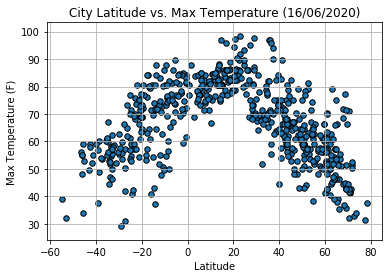

In [185]:

ax1 = clean_city_data.plot(x='Lat', 
                           y='Max Temp',
                           kind='scatter',
                           grid=True,
                           edgecolor='k',
                           s=30,
                           title=f"City Latitude vs. Max Temperature ({utc_date})",
                           ylim=(min(clean_city_data['Max Temp'])-5, max(clean_city_data['Max Temp'])+5)
                          )            


_=ax1.set_xlabel('Latitude')
_=ax1.set_ylabel('Max Temperature (F)')


## Latitude vs. Humidity Plot

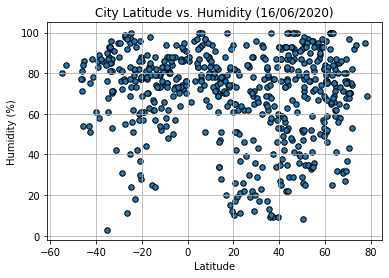

In [186]:

ax2 = clean_city_data.plot(x='Lat', 
                           y='Humidity',
                           kind='scatter',
                           grid=True,
                           edgecolor='k',
                           s=30,
                           title=f"City Latitude vs. Humidity ({utc_date})",
                           ylim=(min(clean_city_data['Humidity'])-5, max(clean_city_data['Humidity'])+5)
                          )            


_=ax2.set_xlabel('Latitude')
_=ax2.set_ylabel('Humidity (%)')


## Latitude vs. Cloudiness Plot

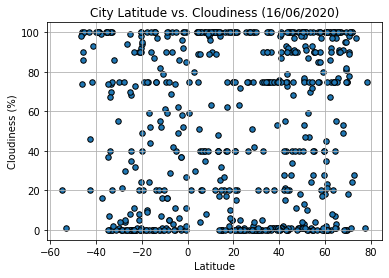

In [187]:
ax3 = clean_city_data.plot(x='Lat', 
                           y='Cloudiness',
                           kind='scatter',
                           grid=True,
                           edgecolor='k',
                           s=30,
                           title=f"City Latitude vs. Cloudiness ({utc_date})",
                           ylim=(min(clean_city_data['Cloudiness'])-5, max(clean_city_data['Cloudiness'])+5)
                          )            


_=ax3.set_xlabel('Latitude')
_=ax3.set_ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

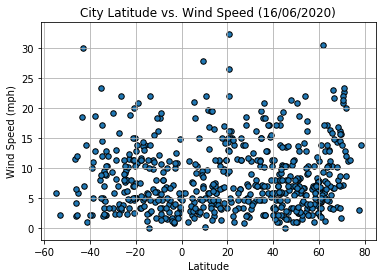

In [188]:
ax4 = clean_city_data.plot(x='Lat', 
                           y='Wind Speed',
                           kind='scatter',
                           grid=True,
                           edgecolor='k',
                           s=30,
                           title=f"City Latitude vs. Wind Speed ({utc_date})",
                           ylim=(min(clean_city_data['Wind Speed'])-2, max(clean_city_data['Wind Speed'])+2)
                          )            


_=ax4.set_xlabel('Latitude')
_=ax4.set_ylabel('Wind Speed (mph)')

## Linear Regression

In [375]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregress_plots(DF, xl, yl, xlabel='Latitude', ylabel='', title=''):

    m, c, r, p, _ = linregress(DF[xl], DF[yl])
    print(f"The r-squared is: {r**2}")
    

    #Create a new figure
    _=plt.figure()

    #Scatter plot
    ax = DF.plot(x=xl, 
              y=yl,
              kind='scatter',
              s=30,
              title=title,
              ylim = (min(DF[yl])-5, max(DF[yl]+15))
              )            

    _=ax.set_xlabel(xlabel)
    _=ax.set_ylabel(ylabel)

    #Regression Line
    y=m*DF[xl] + c
    _=ax.plot(DF[xl], y, 'r-')
    
    
    pos=((0.15, 0.2) if m<=-0.4 else ((0.15, 0.75) if m>0.4 else (0.5, 0.80))) #Annotate position
    
    #A way to dynamically finds the number of decimal positions if there is avery small value Eg:- 0.000000067
    #We don't want to denote it as 0.00
    val = m*100
    digits = 2
    while int(val)==0:
        val*=10
        digits+=1
    
    s = "{:."+f"{digits}"+"f}"
    format_string = "y = "+s+"x + {:.2f}"
    linear_eqn = format_string.format(m, c)
    _=ax.annotate(linear_eqn,
            xy=pos, xycoords='figure fraction', fontsize=15, color='r')

    _=plt.show()
    return(r, p)

#This function returns the r value, and p value
#r value: Pearson Correlation Coefficient
#p value: is a measure of the significance of the gradient. If p value is < 0.01 (Significance level),
#it means that, we cannot independent variable affects dependant variable




In [376]:
# Create Northern and Southern Hemisphere DataFrames
NHS = clean_city_data[clean_city_data['Lat']>=0]#Northern Hemisphere (Keeping equator part of NHS; tie breaking)
SHS = clean_city_data[clean_city_data['Lat']<0]#Southern Hemisphere

NHS.info()
SHS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 579
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        394 non-null    object 
 1   Country     394 non-null    object 
 2   Lat         394 non-null    float64
 3   Lng         394 non-null    float64
 4   Max Temp    394 non-null    float64
 5   Humidity    394 non-null    float64
 6   Cloudiness  394 non-null    float64
 7   Wind Speed  394 non-null    float64
dtypes: float64(6), object(2)
memory usage: 27.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1 to 583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        190 non-null    object 
 1   Country     190 non-null    object 
 2   Lat         190 non-null    float64
 3   Lng         190 non-null    float64
 4   Max Temp    190 non-null    float64
 5   Humidity    190 non-null    float64
 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5997484139171725


<Figure size 432x288 with 0 Axes>

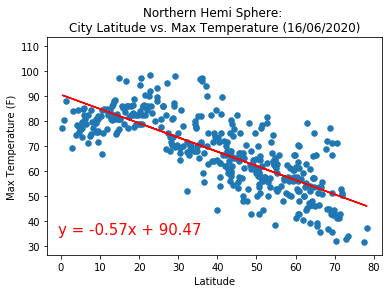

(-0.7744342540959642, 5.923563163145846e-80)

In [377]:
linregress_plots(NHS, 'Lat', 'Max Temp', ylabel='Max Temperature (F)', title=f"Northern Hemi Sphere: \nCity Latitude vs. Max Temperature ({utc_date})")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3993936824180317


<Figure size 432x288 with 0 Axes>

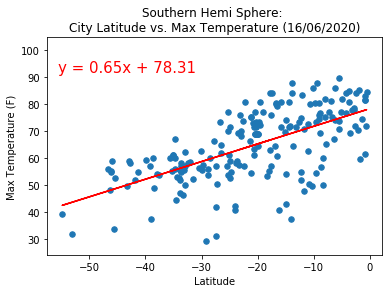

(0.6319760141160673, 1.4049493681806508e-22)

In [378]:
linregress_plots(SHS, 'Lat', 'Max Temp', ylabel='Max Temperature (F)', title=f"Southern Hemi Sphere: \nCity Latitude vs. Max Temperature ({utc_date})")


* Temperature depends on the distance from equator. 
    * Please observe the p value of the linear regression estimator << 0. This means that slope is NOT zero
    * In both hemispheres, a high correlation between latitude and temperature
    * We can observe a pattern in scatter plot also
* As we move towards equator, temperature increases in both sides of the hemisphere
* From the data, it looks like, temperatures at cities equidistant from equator in both the sides might not be same.
    * For instance, 
        * At latitude +30, temperature is approximated as -0.57*30+90.47=73.37F
        * At latitude -30, temperature is approximated as 0.65*-30+78.31 = 58.81F. 
    * This is because, most of the northern hemisphere is land and most of the southern hemisphere is ocean and ocean is likely to be colder



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 9.059160220377726e-06


<Figure size 432x288 with 0 Axes>

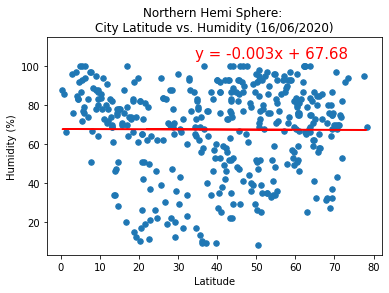

(-0.003009843886379778, 0.9525108474813493)

In [379]:
linregress_plots(NHS, 'Lat', 'Humidity', ylabel='Humidity (%)', title=f"Northern Hemi Sphere: \nCity Latitude vs. Humidity ({utc_date})")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.8256736487572014e-06


<Figure size 432x288 with 0 Axes>

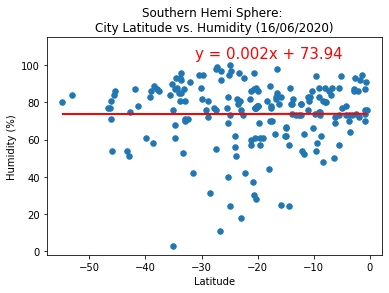

(0.0013511749141977146, 0.9852385688782551)

In [380]:
linregress_plots(SHS, 'Lat', 'Humidity', ylabel='Humidity (%)', title=f"Southern Hemi Sphere: \nCity Latitude vs. Humidity ({utc_date})")


* Humidity(%) doesn't depend on the distance from equator. 
    * Please observe that p value of the linear regression estimator >> 0 (>significance level(typically 0.05)). This means that WE CANNOT say that slope is NOT zero.
    * In both hemispheres, a near to ZERO correlation between latitude and humidity.
    * No pattern in scatter plot.
* Humidity is centered around different values in both hemispheres.
    * In northern hemisphere, most of the cities are having humidity around 67%.
    * In southern hemisphere, most of the cities are having humidity around 73%.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002317925449897531


<Figure size 432x288 with 0 Axes>

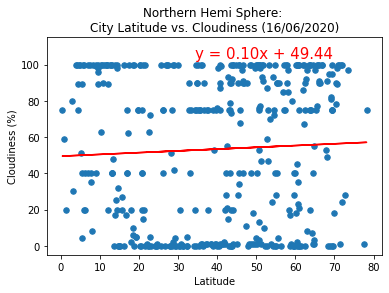

(0.04814483824770347, 0.3405068458433054)

In [381]:
linregress_plots(NHS, 'Lat', 'Cloudiness', ylabel='Cloudiness (%)', title=f"Northern Hemi Sphere: \nCity Latitude vs. Cloudiness ({utc_date})")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013312301042774238


<Figure size 432x288 with 0 Axes>

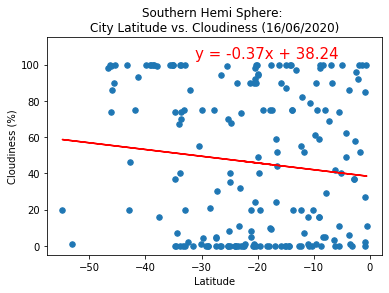

(-0.11537894540501849, 0.11292255640350812)

In [382]:
linregress_plots(SHS, 'Lat', 'Cloudiness', ylabel='Cloudiness (%)', title=f"Southern Hemi Sphere: \nCity Latitude vs. Cloudiness ({utc_date})")


* Cloudiness(%) doesn't depend on the distance from equator. 
    * Please observe that p value of the linear regression estimator > significance level (typically 0.05). This means that WE CANNOT say that slope is NOT zero.
    * In both hemispheres, a weak correlation between latitude and cloudiness.
    * No pattern in scatter plot.
* Cloudiness is centered around different values in both hemispheres.
    * Northern hemisphere has average cloudiness around 53%.
    * Southern hemisphere has average cloudiness around 46%.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003163436132496266


<Figure size 432x288 with 0 Axes>

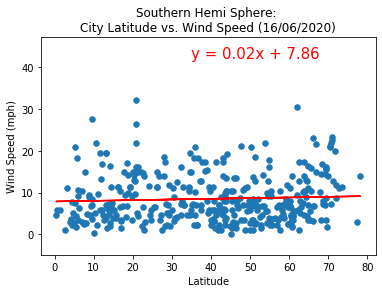

(0.05624443201327813, 0.2653843933638419)

In [387]:
linregress_plots(NHS, 'Lat', 'Wind Speed', ylabel='Wind Speed (mph)', title=f"Southern Hemi Sphere: \nCity Latitude vs. Wind Speed ({utc_date})")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.018348928225542696


<Figure size 432x288 with 0 Axes>

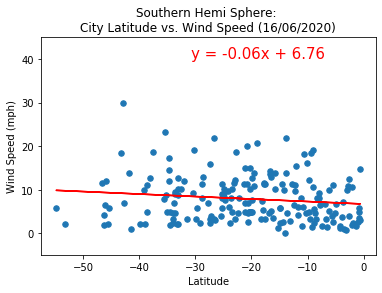

(-0.1354582157919655, 0.06240047742985058)

In [388]:
linregress_plots(SHS, 'Lat', 'Wind Speed', ylabel='Wind Speed (mph)', title=f"Southern Hemi Sphere: \nCity Latitude vs. Wind Speed ({utc_date})")


* Windspeed doesn't depend on the distance from equator. 
    * Please observe that p value of the linear regression estimator > significance level (typically 0.05).
        This means that WE CANNOT say that slope is NOT zero.
    * In both hemispheres, a weak correlation between latitude and Windspeed.
    * No pattern in scatter plot.
* Windspeed is centered around different but close values in both hemispheres.
    * Northern hemisphere has average windspeed around 8.6 mph.
    * Southern hemisphere has average windspeed around 7.9 mph.